In [15]:
""" 
pip install -U scikit-learn scipy matplotlib
ipython kernel install --user --name=kitchen
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from os.path import abspath, join
import os

DATABASE_DIR = abspath(join(abspath(''), '..', 'databases'))
NPY_DIR = join(DATABASE_DIR, 'gmm')

['veggiecabbage' 'veggietomato' 'veggieartichoke' 'veggiepotato'
 'veggiezucchini' 'bottle' 'medicine' 'veggiesweetpotato' 'braiserlid']


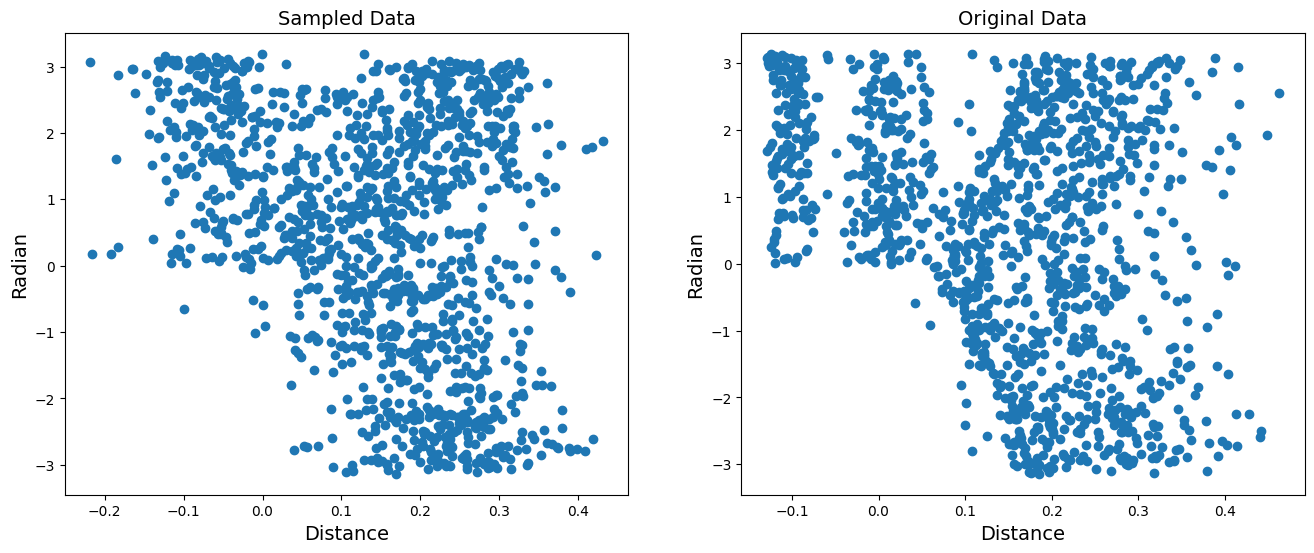

In [17]:
def load_df(file_name="place.csv"):
    df = pd.read_csv(join(DATABASE_DIR, file_name), index_col=0)
    print(df.Category.unique())
    return df

def get_samples(df, cat):
    sub_df = df[df.Category==cat]
    X = sub_df[["Distance", "Radian"]].to_numpy()
    return X

def fit_gmm(x):
    # Learn Gaussian Mixture
    num_components = 30
    gmm = GaussianMixture(n_components=num_components).fit(X)
    return gmm

def save_gmm(gmm, gmm_name):
    np.save(join(NPY_DIR, gmm_name + '_weights'), gmm.weights_, allow_pickle=False)
    np.save(join(NPY_DIR, gmm_name + '_means'), gmm.means_, allow_pickle=False)
    np.save(join(NPY_DIR, gmm_name + '_covariances'), gmm.covariances_, allow_pickle=False)

def load_gmm(gmm_name):
    means = np.load(join(NPY_DIR, gmm_name + '_means.npy'))
    covar = np.load(join(NPY_DIR, gmm_name + '_covariances.npy'))
    loaded_gmm = GaussianMixture(n_components = len(means), covariance_type='full')
    loaded_gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covar))
    loaded_gmm.weights_ = np.load(join(NPY_DIR, gmm_name + '_weights.npy'))
    loaded_gmm.means_ = means
    loaded_gmm.covariances_ = covar
    return loaded_gmm
    
def plot_gmm(gmm, X):
    # Sample Data
    num_original_data = X.shape[0]
    sampled_X = gmm.sample(num_original_data)[0]

    # Post process
    # truncate radians outside [-pi, pi]
    sampled_X[sampled_X[:,0] > np.pi, 0] = np.pi
    sampled_X[sampled_X[:,0] < -np.pi, 0] = -np.pi
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))

    ax[0].scatter(sampled_X[:,0], sampled_X[:,1])
    ax[0].set_title("Sampled Data", fontsize=14)
    ax[0].set_xlabel("Distance", fontsize=14)
    ax[0].set_ylabel("Radian", fontsize=14)

    ax[1].scatter(X[:,0], X[:,1])
    ax[1].set_title("Original Data", fontsize=14)
    ax[1].set_xlabel("Distance", fontsize=14)
    ax[1].set_ylabel("Radian", fontsize=14)
    plt.show()
    
    
df = load_df()
X = get_samples(df, cat='veggiecabbage')
# gmm = fit_gmm(X)
# save_gmm(gmm, gmm_name='veggiecabbage_anywhere')
loaded_gmm = load_gmm(gmm_name='veggiecabbage_anywhere')
plot_gmm(loaded_gmm, X)